ベルヌーイ分布のベイズ推定
具体例 コイントスの確率推定


In [26]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
mu = sympy.Symbol("u")
def posterior(D, prior):
    global mu
    # 尤度
    likelihood = mu**D[0] * (1-mu)**(D[1]-D[0])
    # 事後確率
    post = prior * likelihood
    # 正規化
    post /= sympy.integrate(post, (mu, 0,1))
    return post

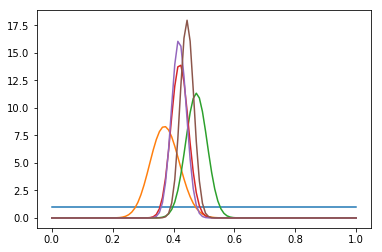

In [29]:
fig = plt.figure(0)
# 事前分布
prior = 1

# 分布のプロット
x = np.linspace(0, 1, 100)
y = [1 for j in x]
plt.plot(x, y)

# 分布の更新 (n: 更新回数)
# 0<=th_min<=th_max<=100
n = 5
th_min = 30
th_max = 60
for i in range(n):
  # サンプリング（コインの表の確率[%]の範囲）
  data = np.random.randint(th_min,th_max)
  
  # 事後分布の計算
  post = posterior((data, 100), prior)
    
  # 事後分布のプロット
  y = [post.subs(mu, j) for j in x]
  plt.plot(x, y)
  prior = post